In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths
from collections import deque
import segmenter as st
from PIL import Image
import os
import json
from collections import Counter

In [ ]:

image_name = "IMG_7747"
image_path = f'../../../dataset/real_life/saihan_bichigten/munguu/mongol_hel/{image_name}.png'  # change this to your file path

# image_path = '../../../dataset/real_life/saihan_bichigten/adiya/raw/IMG_20250422_111558.jpg' 

gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
gray = cv2.rotate(gray, cv2.ROTATE_90_COUNTERCLOCKWISE)
gray = st.estimate_vertical_skew_and_draw(gray)
# Binarize the image (invert to make text=1, background=0)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

Detected skew: 0.00° (to vertical)


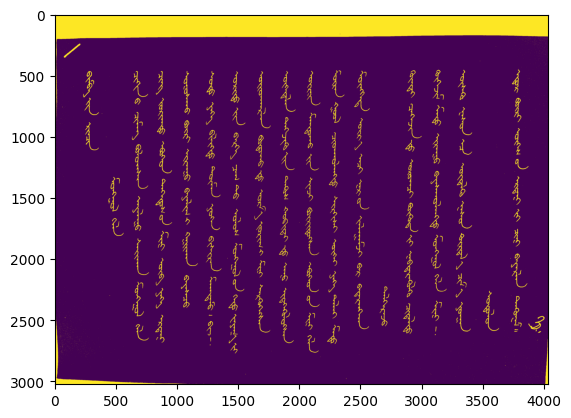

In [51]:
plt.imshow(binary)

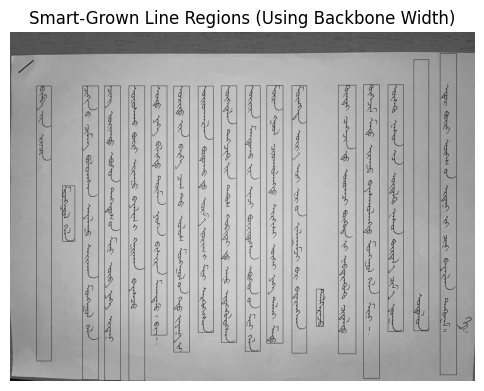

In [36]:
line_bounding_boxes = st.line_segmenter(binary, distance=35, prominence=100)

output = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

for (x_min, y_min, x_max, y_max) in line_bounding_boxes:
    cv2.rectangle(output, (x_min, y_min), (x_max, y_max), (0, 0, 0), 2)
# Visualize the regions
plt.figure(figsize=(6, 8))
plt.title("Smart-Grown Line Regions (Using Backbone Width)")
plt.imshow(output, cmap='gray')
plt.axis('off')
plt.show()

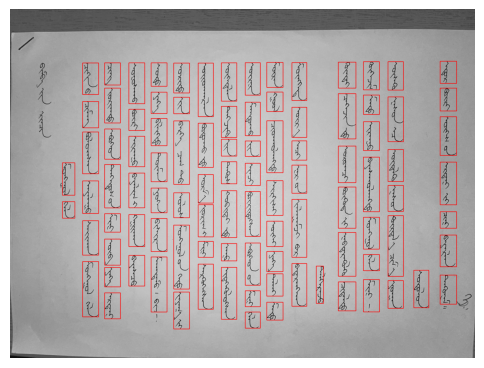

In [43]:
output = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

all_word_bboxes = []

for line_bbox in line_bounding_boxes[1:]:
    words = st.segment_words_from_line(gray, binary, line_bbox, adiya=True)
    all_word_bboxes.extend(words)

# Draw all word bounding boxes
for (x_min, y_min, x_max, y_max) in all_word_bboxes:
    cv2.rectangle(output, (x_min, y_min), (x_max, y_max), (255, 0, 0), 3)

plt.figure(figsize=(6, 8))

plt.imshow(output, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
words = [
    "ᠮᠣᠩᠭᠤᠯ", "ᠬᠡᠯᠡ",
    "ᠢᠬᠢᠨ", "ᠤ", "ᠴᠢᠮᠡᠭ", "ᠪᠤᠯᠤᠭᠰᠠᠨ", "ᠠᠶᠠᠯᠭᠤ", "ᠰᠠᠢᠢᠬᠠᠨ", "ᠮᠣᠩᠭᠤᠯ", "ᠬᠡᠯᠡ",
    "ᠴᠢᠩ", "ᠵᠣᠷᠢᠭᠲᠤ", "ᠡᠪᠦᠭᠡᠳ", "ᠳᠡᠭᠡᠳᠦᠰ", "ᠦᠨ", "ᠮᠢᠨᠢ", "ᠦᠪ", "ᠶᠡᠬᠡ", "ᠡᠷᠳᠡᠨᠢ",
    "ᠰᠣᠨᠣᠰᠬᠣ", "ᠪᠦᠷᠢ", "ᠢᠷᠠᠭᠤ", "ᠪᠠᠶᠠᠯᠠᠭ", "ᠢ", "ᠭᠠᠢᠢᠬᠠᠨ", "ᠪᠠᠶᠠᠰᠴᠤ",
    "ᠰᠣᠳᠤ", "ᠶᠡᠬᠡ", "ᠪᠢᠯᠢᠭ᠌", "ᠲᠦ", "ᠲᠦᠮᠡᠨ", "ᠶᠣᠭᠡᠨ", "ᠪᠢᠰᠢᠷᠡᠨ", "ᠮᠠᠭᠲᠠᠮᠦ", "ᠪᠢ",

    "ᠤᠷᠢᠳᠤ", "ᠢᠨ", "ᠪᠡᠷᠬᠡ", "ᠴᠠᠭ", "ᠲᠣᠷ", "ᠤᠯᠤᠰ", "ᠮᠣᠩᠭᠤᠯ", "ᠤᠨ", "ᠬᠡᠲᠦ", "ᠵᠠᠶᠠᠭ᠎ᠠ", "ᠢᠢ",
    "ᠤᠢᠢᠳᠬᠠᠷᠯᠠᠨ", "ᠪᠣᠳᠣᠬᠣ", "ᠳᠣᠷ", "ᠤᠷᠮ᠎ᠠ", "ᠵᠣᠷᠢᠭ", "ᠢ", "ᠮᠢᠨᠢ", "ᠰᠡᠷᠭᠦᠭᠡᠭ᠍ᠰᠡᠨ",
    "ᠦᠭᠡᠳᠡᠯᠡᠨ", "ᠲᠡᠭᠵᠢᠬᠦ", "ᠢᠨ", "ᠲᠡᠭᠦᠰ", "ᠬᠤᠪᠢ", "ᠲᠠᠢ", "ᠳᠣᠷ", "ᠠᠨᠤ", "ᠢᠳᠡᠭᠡᠭᠦᠯᠦᠭᠰᠡᠨ",
    "ᠦᠷᠨᠢᠨ", "ᠮᠠᠨᠳᠤᠬᠤ", "ᠢᠨ", "ᠰᠢᠨᠵᠢ", "ᠪᠦᠷᠢᠳᠦᠭᠰᠡᠨ", "ᠡᠪᠦᠭᠡᠳ", "ᠤᠨ", "ᠮᠢᠨᠢ", "ᠬᠡᠯᠡ",

    "ᠮᠦᠷᠡᠨ", "ᠭᠣᠣᠯ", "ᠴᠢᠳᠬᠣᠯᠠᠩᠲᠤ", "ᠰᠢᠷᠬᠢᠰᠢ", "ᠦᠭᠡᠢ", "ᠶᠡᠬᠡ", "ᠳᠠᠯᠠᠢ", "ᠮᠡᠲᠦ",
    "ᠮᠦᠩᠭᠡᠳᠡ", "ᠦᠷ᠎ᠡ", "ᠠᠴᠢ", "ᠨᠠᠷ", "ᠤᠨ", "ᠵᠠᠯᠭᠠᠮᠵᠢ", "ᠪᠠᠷ", "ᠪᠠᠳᠠᠷᠠᠩᠬᠠᠨ", "ᠳᠡᠯᠭᠡᠷᠡᠵᠦ",
    "ᠬᠦᠨᠳᠡᠢ", "ᠴᠡᠭᠡᠵᠢᠨ", "ᠳᠦᠷ", "ᠣᠷᠣᠭᠴᠢ", "ᠪᠦᠭᠦᠳᠡ", "ᠢᠢ", "ᠨᠡᠪᠲᠡᠷᠡᠭᠦᠯᠬᠦ", "ᠴᠢᠳᠠᠯᠲᠤ",
    "ᠬᠦᠭ᠍ᠵᠢᠮ", "ᠮᠡᠲᠦ", "ᠢᠷᠠᠭᠤ", "ᠪᠠᠶᠠᠰᠬᠤᠯᠠᠩᠲᠤ", "ᠮᠣᠩᠭᠤᠯ", "ᠬᠡᠯᠡ",

    "ᠦᠰᠬᠦ", "ᠨᠠᠰᠦᠨ", "ᠡᠴᠡ", "ᠦᠲᠡᠯᠬᠦ", "ᠨᠠᠰᠤᠨ", "ᠬᠦᠷᠲᠡᠯ᠎ᠡ", "ᠴᠢᠮ᠎ᠠ", "ᠶᠤᠭᠠᠨ", "ᠰᠤᠳᠤᠯᠳ",
    "ᠡᠳᠦᠷ", "ᠪᠦᠷᠢ", "ᠦᠭᠡᠰ", "ᠦᠨ", "ᠡᠷᠳᠡᠨᠢ", "ᠢᠢ", "ᠴᠢᠨᠢ", "ᠪᠠᠶᠠᠷᠯᠠᠨ", "ᠳᠡᠭᠦᠨᠡᠮ",
    "ᠲᠦᠮᠡᠨ", "ᠲᠦᠮᠡᠨ", "ᠦᠶ᠎ᠡ", "ᠢᠨ", "ᠣᠶᠣᠨ", "ᠪᠢᠯᠢᠭ᠌", "ᠦᠨ", "ᠦᠯᠡᠮᠵᠢ", "ᠰᠠᠩ", "ᠦᠨ", "ᠡᠭᠦᠳᠡ", "ᠢᠢ", "ᠴᠢᠨᠢ",
    "ᠲᠦᠯᠬᠢᠬᠦ", "ᠪᠦᠷᠢ", "ᠰᠡᠳᠭᠢᠯ", "ᠰᠡᠷᠭᠦᠨ", "ᠮᠠᠩᠨᠠᠢ", "ᠢᠨ", "ᠦᠷᠴᠢᠯᠡᠭᠡ", "ᠲᠡᠨᠢᠶᠨᠡᠮ",
]

In [ ]:
twords = [
    "ᠮᠣᠩᠭᠤᠯ", "ᠬᠡᠯᠡ", #2
    "ᠢᠬᠢᠨ ᠤ", "ᠴᠢᠮᠡᠭ", "ᠪᠤᠯᠤᠭᠰᠠᠨ", "ᠠᠶᠠᠯᠭᠤ", "ᠰᠠᠢᠢᠬᠠᠨ", "ᠮᠣᠩᠭᠤᠯ ᠬᠡᠯᠡ", #6
    "ᠴᠢᠩ", "ᠵᠣᠷᠢᠭᠲᠤ", "ᠡᠪᠦᠭᠡᠳ", "ᠳᠡᠭᠡᠳᠦᠰ ᠦᠨ", "ᠮᠢᠨᠢ", "ᠦᠪ", "ᠶᠡᠬᠡ", "ᠡᠷᠳᠡᠨᠢ", #8
    "ᠰᠣᠨᠣᠰᠬᠣ", "ᠪᠦᠷᠢ", "ᠢᠷᠠᠭᠤ", "ᠪᠠᠶᠠᠯᠠᠭ ᠢ", "ᠭᠠᠢᠢᠬᠠᠨ", "ᠪᠠᠶᠠᠰᠴᠤ",#6
    "ᠰᠣᠳᠤ", "ᠶᠡᠬᠡ", "ᠪᠢᠯᠢᠭ᠌ ᠲᠦ", "ᠲᠦᠮᠡᠨ", "ᠶᠣᠭᠡᠨ", "ᠪᠢᠰᠢᠷᠡᠨ", "ᠮᠠᠭᠲᠠᠮᠦ ᠪᠢ",#7

    "ᠤᠷᠢᠳᠤ", "ᠢᠨ", "ᠪᠡᠷᠬᠡ", "ᠴᠠᠭ", "ᠲᠣᠷ", "ᠤᠯᠤᠰ", "ᠮᠣᠩᠭᠤᠯ", "ᠤᠨ", "ᠬᠡᠲᠦ", "ᠵᠠᠶᠠᠭ᠎ᠠ", "ᠢᠢ",
    "ᠤᠢᠢᠳᠬᠠᠷᠯᠠᠨ", "ᠪᠣᠳᠣᠬᠣ", "ᠳᠣᠷ", "ᠤᠷᠮ᠎ᠠ", "ᠵᠣᠷᠢᠭ", "ᠢ", "ᠮᠢᠨᠢ", "ᠰᠡᠷᠭᠦᠭᠡᠭ᠍ᠰᠡᠨ",
    "ᠦᠭᠡᠳᠡᠯᠡᠨ", "ᠲᠡᠭᠵᠢᠬᠦ", "ᠢᠨ", "ᠲᠡᠭᠦᠰ", "ᠬᠤᠪᠢ", "ᠲᠠᠢ", "ᠳᠣᠷ", "ᠠᠨᠤ", "ᠢᠳᠡᠭᠡᠭᠦᠯᠦᠭᠰᠡᠨ",
    "ᠦᠷᠨᠢᠨ", "ᠮᠠᠨᠳᠤᠬᠤ", "ᠢᠨ", "ᠰᠢᠨᠵᠢ", "ᠪᠦᠷᠢᠳᠦᠭᠰᠡᠨ", "ᠡᠪᠦᠭᠡᠳ", "ᠤᠨ", "ᠮᠢᠨᠢ", "ᠬᠡᠯᠡ",

    "ᠮᠦᠷᠡᠨ", "ᠭᠣᠣᠯ", "ᠴᠢᠳᠬᠣᠯᠠᠩᠲᠤ", "ᠰᠢᠷᠬᠢᠰᠢ", "ᠦᠭᠡᠢ", "ᠶᠡᠬᠡ", "ᠳᠠᠯᠠᠢ", "ᠮᠡᠲᠦ",
    "ᠮᠦᠩᠭᠡᠳᠡ", "ᠦᠷ᠎ᠡ", "ᠠᠴᠢ", "ᠨᠠᠷ", "ᠤᠨ", "ᠵᠠᠯᠭᠠᠮᠵᠢ", "ᠪᠠᠷ", "ᠪᠠᠳᠠᠷᠠᠩᠬᠠᠨ", "ᠳᠡᠯᠭᠡᠷᠡᠵᠦ",
    "ᠬᠦᠨᠳᠡᠢ", "ᠴᠡᠭᠡᠵᠢᠨ", "ᠳᠦᠷ", "ᠣᠷᠣᠭᠴᠢ", "ᠪᠦᠭᠦᠳᠡ", "ᠢᠢ", "ᠨᠡᠪᠲᠡᠷᠡᠭᠦᠯᠬᠦ", "ᠴᠢᠳᠠᠯᠲᠤ",
    "ᠬᠦᠭ᠍ᠵᠢᠮ", "ᠮᠡᠲᠦ", "ᠢᠷᠠᠭᠤ", "ᠪᠠᠶᠠᠰᠬᠤᠯᠠᠩᠲᠤ", "ᠮᠣᠩᠭᠤᠯ", "ᠬᠡᠯᠡ",

    "ᠦᠰᠬᠦ", "ᠨᠠᠰᠦᠨ", "ᠡᠴᠡ", "ᠦᠲᠡᠯᠬᠦ", "ᠨᠠᠰᠤᠨ", "ᠬᠦᠷᠲᠡᠯ᠎ᠡ", "ᠴᠢᠮ᠎ᠠ", "ᠶᠤᠭᠠᠨ", "ᠰᠤᠳᠤᠯᠳ",
    "ᠡᠳᠦᠷ", "ᠪᠦᠷᠢ", "ᠦᠭᠡᠰ", "ᠦᠨ", "ᠡᠷᠳᠡᠨᠢ", "ᠢᠢ", "ᠴᠢᠨᠢ", "ᠪᠠᠶᠠᠷᠯᠠᠨ", "ᠳᠡᠭᠦᠨᠡᠮ",
    "ᠲᠦᠮᠡᠨ", "ᠲᠦᠮᠡᠨ", "ᠦᠶ᠎ᠡ", "ᠢᠨ", "ᠣᠶᠣᠨ", "ᠪᠢᠯᠢᠭ᠌", "ᠦᠨ", "ᠦᠯᠡᠮᠵᠢ", "ᠰᠠᠩ", "ᠦᠨ", "ᠡᠭᠦᠳᠡ", "ᠢᠢ", "ᠴᠢᠨᠢ",
    "ᠲᠦᠯᠬᠢᠬᠦ", "ᠪᠦᠷᠢ", "ᠰᠡᠳᠭᠢᠯ", "ᠰᠡᠷᠭᠦᠨ", "ᠮᠠᠩᠨᠠᠢ", "ᠢᠨ", "ᠦᠷᠴᠢᠯᠡᠭᠡ", "ᠲᠡᠨᠢᠶᠨᠡᠮ",
]

In [52]:
folder_path = "../../../dataset/real_life/saihan_bichigten/munguu/mongol_hel_processed"

output_image_folder = f'{folder_path}/images'
json_output_path = f'{folder_path}/words_data.json'

n = 29

h, w = gray.shape
os.makedirs(output_image_folder, exist_ok=True)

pad = 30
# Save cropped words and build JSON
data = []
for i, ((x_min, y_min, x_max, y_max), text) in enumerate(zip(all_word_bboxes, twords)):
    if i >= n:
        break
    x_min_pad = max(0, x_min - pad)
    y_min_pad = max(0, y_min - pad)
    x_max_pad = min(w, x_max + pad)
    y_max_pad = min(h, y_max + pad)

    word_img = gray[y_min_pad:y_max_pad, x_min_pad:x_max_pad]
    filename = f"word_{i+1:03d}.png"
    full_save_path = os.path.join(output_image_folder, filename)
    
    cv2.imwrite(full_save_path, word_img)
    data.append({
        "image_path": full_save_path,
        "raw_image": image_name,
        "text": text
    })

# Write to JSON
with open(json_output_path, 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=2)

print(f"Saved {len(data)} words and labels.")

Saved 29 words and labels.


In [8]:

image_name = "IMG_7747"
image_path = f'data/nom.png'  # change this to your file path

# image_path = '../../../dataset/real_life/saihan_bichigten/adiya/raw/IMG_20250422_111558.jpg' 

gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# gray = cv2.rotate(gray, cv2.ROTATE_90_COUNTERCLOCKWISE)
gray = st.estimate_vertical_skew_and_draw(gray)
# Binarize the image (invert to make text=1, background=0)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

Detected skew: 0.00° (to vertical)


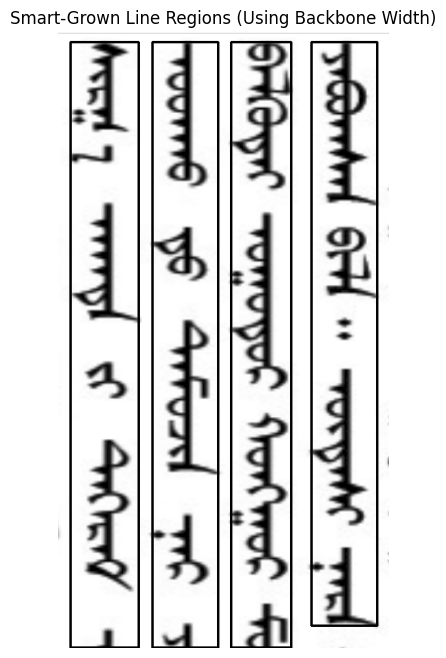

In [9]:
line_bounding_boxes = st.line_segmenter(binary, distance=15, prominence=50)

output = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

for (x_min, y_min, x_max, y_max) in line_bounding_boxes:
    cv2.rectangle(output, (x_min, y_min), (x_max, y_max), (0, 0, 0), 2)
# Visualize the regions
plt.figure(figsize=(6, 8))
plt.title("Smart-Grown Line Regions (Using Backbone Width)")
plt.imshow(output, cmap='gray')
plt.axis('off')
plt.show()

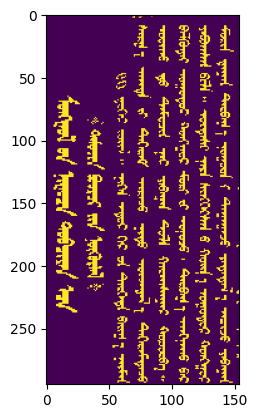

In [8]:
plt.imshow(binary)

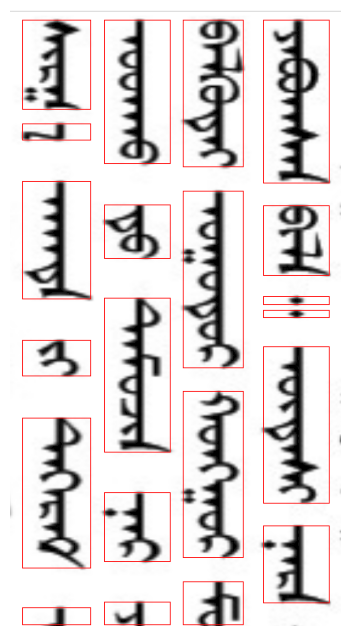

In [14]:
output = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

all_word_bboxes = []

for line_bbox in line_bounding_boxes[0:]:
    words = st.segment_words_from_line(gray, binary, line_bbox, adiya=False, min_area=0)
    all_word_bboxes.extend(words)

# Draw all word bounding boxes
for (x_min, y_min, x_max, y_max) in all_word_bboxes:
    cv2.rectangle(output, (x_min, y_min), (x_max, y_max), (255, 0, 0), 1)

plt.figure(figsize=(6, 8))

plt.imshow(output, cmap='gray')
plt.axis('off')
plt.show()

In [15]:
twords = ["" for _ in range(len(all_word_bboxes))]

folder_path = "../../../dataset/real_life/book/processed"

output_image_folder = f'{folder_path}/images'
json_output_path = f'{folder_path}/words_data.json'

n = 10

h, w = gray.shape
os.makedirs(output_image_folder, exist_ok=True)

pad = 15
# Save cropped words and build JSON
data = []
for i, ((x_min, y_min, x_max, y_max), text) in enumerate(zip(all_word_bboxes, twords)):
    if i >= n:
        break
    x_min_pad = max(0, x_min - pad)
    y_min_pad = max(0, y_min - pad)
    x_max_pad = min(w, x_max + pad)
    y_max_pad = min(h, y_max + pad)

    word_img = gray[y_min_pad:y_max_pad, x_min_pad:x_max_pad]
    filename = f"word_{i+1:03d}.png"
    full_save_path = os.path.join(output_image_folder, filename)
    
    cv2.imwrite(full_save_path, word_img)
    data.append({
        "image_path": full_save_path,
        # "raw_image": image_name,
        "text": text
    })

# Write to JSON
with open(json_output_path, 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=2)

print(f"Saved {len(data)} words and labels.")

Saved 10 words and labels.
